In [137]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as Circle

import numpy as np

import warnings
warnings.filterwarnings("ignore")

Load CSV and drop columns where all the values coincide. For example, the activation used.

In [138]:
df = pd.read_csv("DVIP_UCI.csv")
df

,dataset_name,epochs,vip_layers,bb_alpha,split,time,LOSS_train,RMSE_train,NLL_train,CRPS_train,LOSS,RMSE,NLL,CRPS
0,boston,30000,[1],0.5,0,947.088792,83.050125,4.013555,2.560366,1.889162,86.901184,5.810468,2.893920,2.522498
1,boston,30000,[1],0.5,1,1771.547177,77.932961,3.693184,2.555254,1.824108,134.497406,7.769233,3.631960,3.224374
2,boston,30000,[1],0.5,10,720.077081,88.203262,4.113532,2.633990,2.000119,61.561394,4.229448,2.549286,1.864191
3,boston,30000,[1],0.5,11,724.710273,90.321083,4.166136,2.601059,1.960059,67.053459,3.321248,2.577730,1.836293
4,boston,30000,[1],0.5,12,737.149604,83.512566,4.113909,2.567677,1.886187,77.295074,5.773445,2.752850,2.522697
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
950,winered,10000,[5],0.0,5,3285.199776,185.255463,0.594656,0.899719,0.331825,171.861191,0.608990,0.918855,0.338719
951,winered,10000,[5],0.0,6,3390.904119,170.520706,0.605229,0.917294,0.336577,158.587341,0.631556,0.951017,0.352483
952,winered,10000,[5],0.0,7,4145.718367,165.053528,0.617765,0.937104,0.344496,145.630325,0.592313,0.893711,0.322335
953,winered,10000,[5],0.0,8,3322.538187,181.589508,0.596899,0.903370,0.332843,178.494644,0.675231,1.028791,0.376126


Group table by their common parameters and compute mean and std over split

In [139]:
def std(x):
    return np.std(x)/np.sqrt(len(x))
full_df = df.groupby(["dataset_name", "vip_layers", "bb_alpha"]).agg(["mean", std])
full_df


epochs     split                   time  \
                                   mean std  mean       std         mean   
dataset_name vip_layers bb_alpha                                           
boston       [1]        0.0       30000   0   9.5  1.289380   813.128402   
                        0.5       30000   0   9.5  1.289380  1162.945847   
             [2]        0.0       30000   0   9.5  1.289380  1576.551487   
             [3]        0.0       30000   0   9.5  1.289380  3293.545944   
             [4]        0.0       30000   0   9.5  1.289380  2869.360393   
             [5]        0.0       30000   0   9.5  1.289380  5278.456145   
concrete     [1]        0.0       15000   0   9.5  1.289380   925.790984   
                        0.5       15000   0   9.5  1.289380  1382.446615   
             [2]        0.0       15000   0   9.5  1.289380  1372.515035   
             [3]        0.0       15000   0   9.5  1.289380  2920.480342   
             [4]        0.0       15000   0   9.5  1.289380  2888.881293   
             [5]        0.0       15000   0   9.5  1.289380  3780.922273   
energy       [1]        0.0       21429   0   9.5  1.289380  1006.974587   
                        0.5       21429   0   9.5  1.289380   967.936830   
             [2]        0.0       21429   0   9.5  1.289380  1626.892170   
             [3]        0.0       21429   0   9.5  1.289380  3296.586383   
             [4]        0.0       21429   0   9.5  1.289380  4824.855192   
             [5]        0.0       21429   0   9.5  1.289380  5537.141233   
kin8nm       [1]        0.0        2027   0   9.5  1.289380  1318.690635   
                        0.5        2027   0   9.5  1.289380  1044.498654   
             [2]        0.0        2027   0   9.5  1.289380  2303.140260   
             [3]        0.0        2027   0   9.5  1.289380  2794.241070   
             [4]        0.0        2027   0   9.5  1.289380  3297.813604   
             [5]        0.0        2027   0   9.5  1.289380  5404.959986   
naval        [1]        0.0        1389   0   9.5  1.289380  1546.005558   
                        0.5        1389   0   9.5  1.289380  1040.373658   
             [2]        0.0        1389   0   9.5  1.289380  2298.040676   
             [3]        0.0        1389   0   9.5  1.289380  3878.920786   
             [4]        0.0        1389   0   9.5  1.289380  4261.183906   
             [5]        0.0        1389   0   9.5  1.289380  4190.257355   
power        [1]        0.0        1724   0   9.5  1.289380  1098.323444   
                        0.5        1724   0   9.5  1.289380  1036.660659   
             [2]        0.0        1724   0   9.5  1.289380  1722.326139   
             [3]        0.0        1724   0   9.5  1.289380  3072.625004   
             [4]        0.0        1724   0   9.5  1.289380  3242.734008   
             [5]        0.0        1724   0   9.2  1.665866  4997.079901   
protein      [1]        0.0         364   0   9.5  1.289380   885.030679   
                        0.5         364   0   9.5  1.289380  1048.211414   
             [2]        0.0         364   0   9.5  1.289380  1639.357125   
             [3]        0.0         364   0   9.5  1.289380  2677.289580   
             [4]        0.0         364   0   9.5  1.289380  4302.105854   
             [5]        0.0         364   0   9.5  1.289380  5477.600183   
winered      [1]        0.0       10000   0   9.5  1.289380   941.907045   
                        0.5       10000   0   9.5  1.289380   830.948688   
             [2]        0.0       10000   0   9.5  1.289380  1579.862433   
             [3]        0.0       10000   0   9.5  1.289380  3199.005779   
             [4]        0.0       10000   0   9.5  1.289380  3088.100334   
             [5]        0.0       10000   0   9.5  1.289380  4733.325349   

                                               LOSS_train             \
                                         std         mean        std   
dataset_name

# Comparative with other models

In [140]:
vip = full_df.query("bb_alpha == 0.0")
vip


epochs     split                   time  \
                                   mean std  mean       std         mean   
dataset_name vip_layers bb_alpha                                           
boston       [1]        0.0       30000   0   9.5  1.289380   813.128402   
             [2]        0.0       30000   0   9.5  1.289380  1576.551487   
             [3]        0.0       30000   0   9.5  1.289380  3293.545944   
             [4]        0.0       30000   0   9.5  1.289380  2869.360393   
             [5]        0.0       30000   0   9.5  1.289380  5278.456145   
concrete     [1]        0.0       15000   0   9.5  1.289380   925.790984   
             [2]        0.0       15000   0   9.5  1.289380  1372.515035   
             [3]        0.0       15000   0   9.5  1.289380  2920.480342   
             [4]        0.0       15000   0   9.5  1.289380  2888.881293   
             [5]        0.0       15000   0   9.5  1.289380  3780.922273   
energy       [1]        0.0       21429   0   9.5  1.289380  1006.974587   
             [2]        0.0       21429   0   9.5  1.289380  1626.892170   
             [3]        0.0       21429   0   9.5  1.289380  3296.586383   
             [4]        0.0       21429   0   9.5  1.289380  4824.855192   
             [5]        0.0       21429   0   9.5  1.289380  5537.141233   
kin8nm       [1]        0.0        2027   0   9.5  1.289380  1318.690635   
             [2]        0.0        2027   0   9.5  1.289380  2303.140260   
             [3]        0.0        2027   0   9.5  1.289380  2794.241070   
             [4]        0.0        2027   0   9.5  1.289380  3297.813604   
             [5]        0.0        2027   0   9.5  1.289380  5404.959986   
naval        [1]        0.0        1389   0   9.5  1.289380  1546.005558   
             [2]        0.0        1389   0   9.5  1.289380  2298.040676   
             [3]        0.0        1389   0   9.5  1.289380  3878.920786   
             [4]        0.0        1389   0   9.5  1.289380  4261.183906   
             [5]        0.0        1389   0   9.5  1.289380  4190.257355   
power        [1]        0.0        1724   0   9.5  1.289380  1098.323444   
             [2]        0.0        1724   0   9.5  1.289380  1722.326139   
             [3]        0.0        1724   0   9.5  1.289380  3072.625004   
             [4]        0.0        1724   0   9.5  1.289380  3242.734008   
             [5]        0.0        1724   0   9.2  1.665866  4997.079901   
protein      [1]        0.0         364   0   9.5  1.289380   885.030679   
             [2]        0.0         364   0   9.5  1.289380  1639.357125   
             [3]        0.0         364   0   9.5  1.289380  2677.289580   
             [4]        0.0         364   0   9.5  1.289380  4302.105854   
             [5]        0.0         364   0   9.5  1.289380  5477.600183   
winered      [1]        0.0       10000   0   9.5  1.289380   941.907045   
             [2]        0.0       10000   0   9.5  1.289380  1579.862433   
             [3]        0.0       10000   0   9.5  1.289380  3199.005779   
             [4]        0.0       10000   0   9.5  1.289380  3088.100334   
             [5]        0.0       10000   0   9.5  1.289380  4733.325349   

                                               LOSS_train             \
                                         std         mean        std   
dataset_name vip_layers bb_alpha                                       
boston       [1]        0.0        73.159558    97.309732   0.475787   
             [2]        0.0       148.134952   271.783607   6.086261   
             [3]        0.0       256.324595   226.257678   2.858283   
             [4]        0.0       141.518273   214.300974   4.393116   
             [5]        0.0       335.383852   219.809933   4.682595   
concrete     [1]        0.0        21.957791   108.839669   0.329137   
             [2]        0.0        38.192700   373.834991   6.387179   
             [3]        0.0       103.419854

In [141]:
vip_05 =  full_df.query("bb_alpha == 0.5")
vip_05

epochs     split                  time  \
                                   mean std  mean      std         mean   
dataset_name vip_layers bb_alpha                                          
boston       [1]        0.5       30000   0   9.5  1.28938  1162.945847   
concrete     [1]        0.5       15000   0   9.5  1.28938  1382.446615   
energy       [1]        0.5       21429   0   9.5  1.28938   967.936830   
kin8nm       [1]        0.5        2027   0   9.5  1.28938  1044.498654   
naval        [1]        0.5        1389   0   9.5  1.28938  1040.373658   
power        [1]        0.5        1724   0   9.5  1.28938  1036.660659   
protein      [1]        0.5         364   0   9.5  1.28938  1048.211414   
winered      [1]        0.5       10000   0   9.5  1.28938   830.948688   

                                              LOSS_train           RMSE_train  \
                                         std        mean       std       mean   
dataset_name vip_layers bb_alpha                                                
boston       [1]        0.5       131.951614   86.583682  0.717262   4.031653   
concrete     [1]        0.5        83.959267  100.199480  0.346501   7.356507   
energy       [1]        0.5        31.285111   38.295473  0.283441   2.481315   
kin8nm       [1]        0.5         4.030113  154.730733  0.082741   0.174399   
naval        [1]        0.5         4.527908   89.176780  1.904345   0.004172   
power        [1]        0.5         2.492920   54.649208  0.279667   4.189312   
protein      [1]        0.5         2.067558  181.687079  0.070410   5.030952   
winered      [1]        0.5        34.893328  140.705026  0.359005   0.626704   

                                            ... CRPS_train            \
                                       std  ...       mean       std   
dataset_name vip_layers bb_alpha            ...                        
boston       [1]        0.5       0.032533  ...   1.928150  0.013204   
concrete     [1]        0.5       0.020113  ...   4.052705  0.010348   
energy       [1]        0.5       0.025621  ...   1.198556  0.010772   
kin8nm       [1]        0.5       0.000111  ...   0.097935  0.000064   
naval        [1]        0.5       0.000176  ...   0.001781  0.000050   
power        [1]        0.5       0.005451  ...   2.300481  0.002358   
protein      [1]        0.5       0.001337  ...   2.861607  0.001045   
winered      [1]        0.5       0.000860  ...   0.348840  0.000474   

                                        LOSS                RMSE            \
                                        mean       std      mean       std   
dataset_name vip_layers bb_alpha                                             
boston       [1]        0.5        77.572814  3.732558  4.783981  0.283339   
concrete     [1]        0.5       105.812481  2.142153  7.756310  0.157415   
energy       [1]        0.5        46.077536  2.792272  2.582581  0.089083   
kin8nm       [1]        0.5       154.725047  0.563391  0.177264  0.000929   
naval        [1]        0.5        89.096422  1.644158  0.004088  0.000160   
power        [1]        0.5        55.410612  1.017221  4.214445  0.039521   
protein      [1]        0.5       181.596702  0.266336  5.048422  0.011921   
winered      [1]        0.5       124.760699  1.259293  0.625164  0.007610   

                                       NLL                CRPS            
                                      mean       std      mean       std  
dataset_name vip_layers bb_alpha                                          
boston       [1]        0.5       2.768506  0.054108  2.252778  0.085632  
concrete     [1]        0.5       3.456395  0.020407  4.293517  0.082143  
energy       [1]        0.5       2.079758  0.027015  1.278927  0.045067  
kin8nm       [1]        0.5      -0.311200  0.005279  0.099532  0.000547  
naval        [1]        0.5      -4.501062  0.022913  0.001764  0.000038  
power        [1]        0.5       2.858737  0.009416  2.310517 

In [142]:
doubly = pd.read_csv("DGP_UCI.csv")
doubly = doubly.groupby(["dataset", "layers"]).agg(["mean", std])
doubly

split          iterations     batch           NLL            \
                 mean      std       mean std  mean std      mean       std   
dataset  layers                                                               
boston   1        9.5  1.28938     150000   0   100   0  2.626961  0.059719   
         2        9.5  1.28938     150000   0   100   0  2.631574  0.057504   
         3        9.5  1.28938     150000   0   100   0  2.636580  0.056283   
         4        9.5  1.28938     150000   0   100   0  2.642696  0.054779   
         5        9.5  1.28938     150000   0   100   0  2.654346  0.054967   
concrete 1        9.5  1.28938     150000   0   100   0  3.167927  0.015877   
         2        9.5  1.28938     150000   0   100   0  3.174262  0.015798   
         3        9.5  1.28938     150000   0   100   0  3.208398  0.015462   
         4        9.5  1.28938     150000   0   100   0  3.136751  0.014723   
         5        9.5  1.28938     150000   0   100   0  3.129200  0.017043   
energy   1        9.5  1.28938     150000   0   100   0  1.548680  0.023252   
         2        9.5  1.28938     150000   0   100   0  0.726727  0.015103   
         3        9.5  1.28938     150000   0   100   0  0.740636  0.018919   
         4        9.5  1.28938     150000   0   100   0  0.728004  0.015440   
         5        9.5  1.28938     150000   0   100   0  0.731546  0.016412   
kin8nm   1        9.5  1.28938     150000   0   100   0 -0.913354  0.004004   
         2        9.5  1.28938     150000   0   100   0 -1.293469  0.004751   
         3        9.5  1.28938     150000   0   100   0 -1.327223  0.004574   
         4        9.5  1.28938     150000   0   100   0 -1.334008  0.004058   
         5        9.5  1.28938     150000   0   100   0 -1.303382  0.003904   
naval    1        9.5  1.28938     150000   0   100   0 -6.110009  0.067545   
         2        9.5  1.28938     150000   0   100   0 -6.358850  0.099669   
         3        9.5  1.28938     150000   0   100   0 -6.216863  0.048916   
         4        9.5  1.28938     150000   0   100   0 -6.273566  0.067506   
         5        9.5  1.28938     150000   0   100   0 -6.213561  0.089894   
power    1        9.5  1.28938     150000   0   100   0  2.846136  0.009459   
         2        9.5  1.28938     150000   0   100   0  2.810668  0.010179   
         3        9.5  1.28938     150000   0   100   0  2.806392  0.009463   
         4        9.5  1.28938     150000   0   100   0  2.807379  0.009241   
         5        9.5  1.28938     150000   0   100   0  2.800640  0.011394   
protein  1        9.5  1.28938     150000   0   100   0  2.936848  0.002535   
         2        9.5  1.28938     150000   0   100   0  2.846682  0.002557   
         3        9.5  1.28938     150000   0   100   0  2.799579  0.003967   
         4        9.5  1.28938     150000   0   100   0  2.799349  0.003130   
         5        9.5  1.28938     150000   0   100   0  2.802206  0.002866   
wine_red 1        9.5  1.28938     150000   0   100   0  0.933053  0.012462   
         2        9.5  1.28938     150000   0   100   0  0.944552  0.011199   
         3        9.5  1.28938     150000   0   100   0  0.945305  0.010788   
         4        9.5  1.28938     150000   0   100   0  0.940919  0.011095   
         5        9.5  1.28938     150000   0   100   0  0.933465  0.012142   

                     RMSE                CRPS                    time  \
                     mean       std      mean       std          mean   
dataset  layers                                                         
boston   1       3.488482  0.177300  1.791255  0.056967   1589.248456   
         2       3.517413  0.186986  1.797935  0.059874  10890.421413   
         3       3.537100  0.195338  1.800784  0.061954  18652.314660   
         4       3.553067  0.201896  1.807732  0.064086  37976.057836   
         5       3.568845  0.205466  1.814692  0.064737  52930.709271   
concrete 1       5.843427  0.12331

In [143]:
def comparative_plot(model_names, mean_values, std_values, colors, ax):
    """
    Creates a plot where the different models are shown in the "y" axis and mean and std values on the x axis.
    The first model is used to create a vertical dashed line, as a benchmark.
    """
    # Compute mean and std of points 
    mean = np.nanmean(mean_values)
    std = np.nanstd(mean_values)
    # Replace non-existint results (np.nan) with a white point (invisible).
    nan_pos = np.isnan(mean_values)
    c = np.array(colors)
    c[nan_pos] = "white"
    means = np.array(mean_values)
    means[nan_pos] = mean
    
    # Compute points that are far from the mean and meake them invisible
    far = means - mean > 2*std
    far[0] = False
    means[far] = np.mean(means[~far])
    c[far] = "white"
    
    # Scatter points
    ax.scatter(means, model_names, c = c, plotnonfinite = True)
    # Draw std horizontal lines
    ax.hlines(np.array(model_names)[~far], np.array(mean_values - std_values)[~far],np.array(means + std_values)[~far], colors= np.array(colors)[~far])
    # Draw baseline line on first model
    if far[0] == False:
        ax.axvline(mean_values[0], linestyle = "dashed", color = "k")
    
    # Plot an arrow for far points.
    if far.any() != 0:
        x_min, x_max = ax.get_xlim()
        slope = (x_max - x_min)/5
        ax.arrow(x = x_max - slope, y = np.array(model_names)[far][0], 
                 dx = slope, dy =0, color = np.array(colors)[far][0],
                 width = 0.002, head_width=0.3, head_length=slope/3, linewidth=1, length_includes_head = True,
                )
        
def get_dataset(dataset, metric, agg, train_metrics = False):
    if dataset == "winered":
        d_dataset = "wine_red"
    else:
        d_dataset = dataset
    vip_query = vip.query("dataset_name == @dataset").xs((metric + "_train" if train_metrics else metric, agg),axis=1).to_frame()
    #vip20_query = vip_20.query("dataset_name == @dataset").xs((metric + "_train" if train_metrics else metric, agg),axis=1).to_frame()
    vip05_query = vip_05.query("dataset_name == @dataset").xs((metric + "_train" if train_metrics else metric, agg),axis=1).to_frame()
    doubly_query = doubly.query("dataset == @d_dataset").xs((metric, agg),axis=1).to_frame()

    def item(array):
        if array.size == 0:
            return np.nan
        else:
            return array.item()
    
    ret = {r"VIP $\alpha=0$": item(vip_query.query("vip_layers == '[1]'").to_numpy()),
            r"VIP $\alpha=0.5$": item(vip05_query.query("vip_layers == '[1]'").to_numpy()),
          "DVIP 2": item(vip_query.query("vip_layers == '[2]'").to_numpy()),
          "DVIP 3": item(vip_query.query("vip_layers == '[3]'").to_numpy()),
          "DVIP 4": item(vip_query.query("vip_layers == '[4]'").to_numpy()),
          "DVIP 5": item(vip_query.query("vip_layers == '[5]'").to_numpy()),
          "DGP": item(doubly_query.query("layers == 1").to_numpy()),
          "DGP 2": item(doubly_query.query("layers == 2").to_numpy()),
          "DGP 3": item(doubly_query.query("layers == 3").to_numpy()) or np.nan,
          "DGP 4": item(doubly_query.query("layers == 4").to_numpy()) or np.nan,
          "DGP 5": item(doubly_query.query("layers == 5").to_numpy()) or np.nan
    }
    
    return ret

def plot_datasets(dataset_names, model_names, colors, metric, train_metrics = False):
    fig, ax = plt.subplots((len(dataset_names) - 1)//4 + 1, min(len(dataset_names), 4), figsize = (20, 10))
    fig.tight_layout(pad=3.0) # Or equivalently,  "plt.tight_layout()"

    for i in range(len(dataset_names)):
        dataset = dataset_names[i]
        if len(dataset_names) < 4:
            axis = ax[i]
        else:
            axis = ax[i// (len(dataset_names)//2), i%(len(dataset_names)//2)]
        axis.set_title(dataset.capitalize())
        axis.locator_params(axis="x", nbins=4)
        if i % 4 > 0:
            axis.tick_params(left = False)
            axis.set_yticklabels([])
        if i % 4 == min(len(dataset_names), 4) - 1:
            axis.yaxis.tick_right()
            axis.set_yticklabels(model_names)
        
        
        comparative_plot(model_names, 
                         np.array([get_dataset(dataset, metric, "mean", train_metrics).get(model, np.nan) for model in model_names]), 
                         np.array([get_dataset(dataset, metric, "std", train_metrics).get(model, np.nan) for model in model_names]), 
                         [colors[model] for model in model_names], 
                         axis)
        
    handles = [
        Circle.Patch(color='darkblue', label='Single layer models'),
        Circle.Patch(color='teal', label='This work'),
        Circle.Patch(color='darkorange', label='Deep GP models'),
        Circle.Patch(color='orchid', label='Bayesian NN'),
    ]

    if len(dataset_names) < 4:
        ax[len(dataset_names) - 1].legend(loc='upper center', bbox_to_anchor=(-0.6, -0.05),
              fancybox=True, shadow=True, ncol=5, handles = handles)
    else:
        ax[1][1].legend(loc='upper center', bbox_to_anchor=(1.1, -0.15),
              fancybox=True, shadow=True, ncol=5, handles = handles)
        
    plt.savefig("../plots/" + metric + ("_train" if train_metrics else "") + "_" +query + "_complete.pdf", bbox_inches='tight')
        

In [144]:
dataset_names = ["boston", "energy", "concrete", "winered", "power", "naval", "protein", "kin8nm"]
model_names = [r"VIP $\alpha=0$", r"VIP $\alpha=0.5$","DVIP 2", "DVIP 3", "DVIP 4", "DVIP 5",
               "DGP", "DGP 2", "DGP 3", "DGP 4", "DGP 5"]
colors = {r"VIP $\alpha=0$": "darkblue", 
          "DVIP 2": "teal", 
          "DVIP 3": "teal", 
          "DVIP 4": "teal", 
          "DVIP 5": "teal", 
          r"VIP $\alpha=0.5$": "darkblue", 
          "DGP": "darkblue",
          "DGP 2": "darkorange", 
          "DGP 3": "darkorange",
          "DGP 4": "darkorange",
          "DGP 5": "darkorange"}

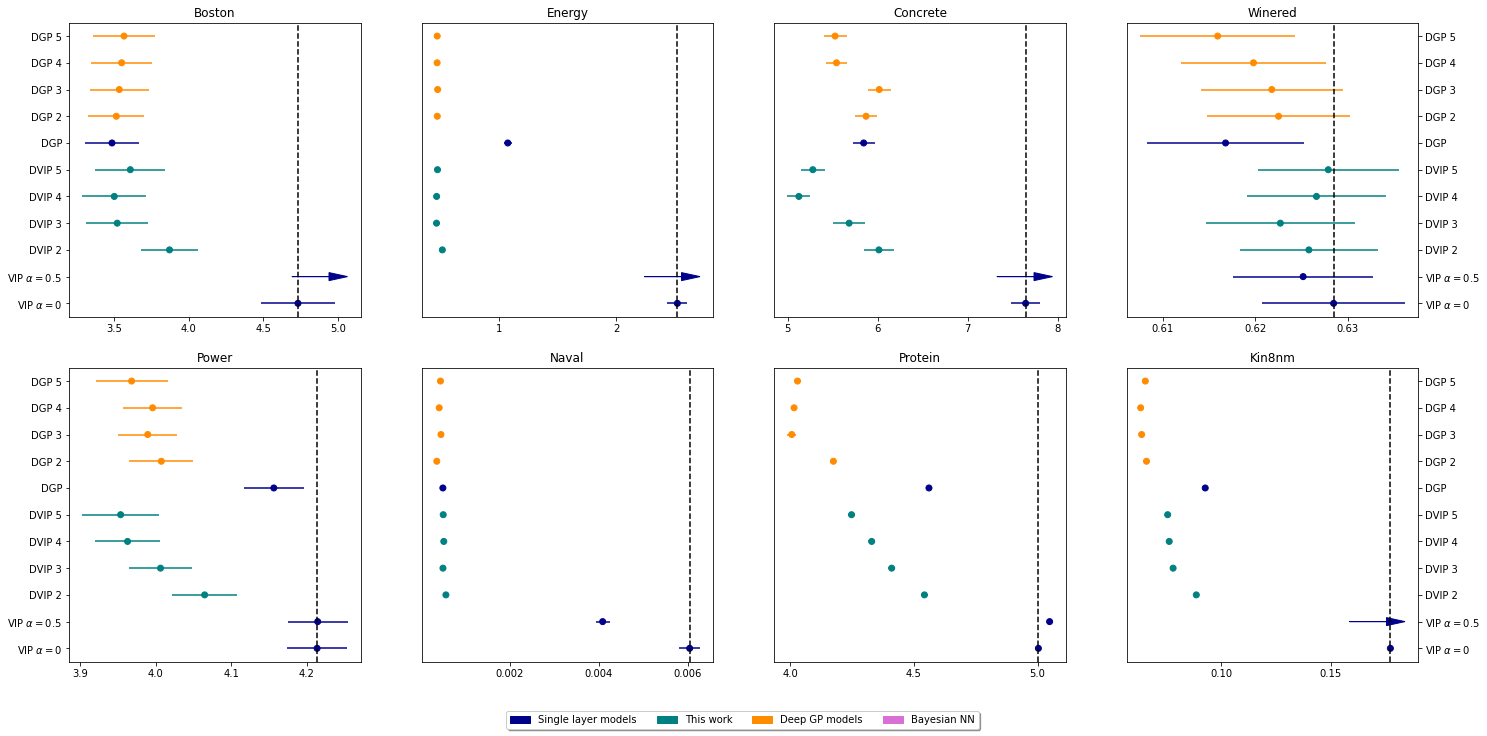

In [145]:
plot_datasets(dataset_names, model_names, colors, "RMSE")

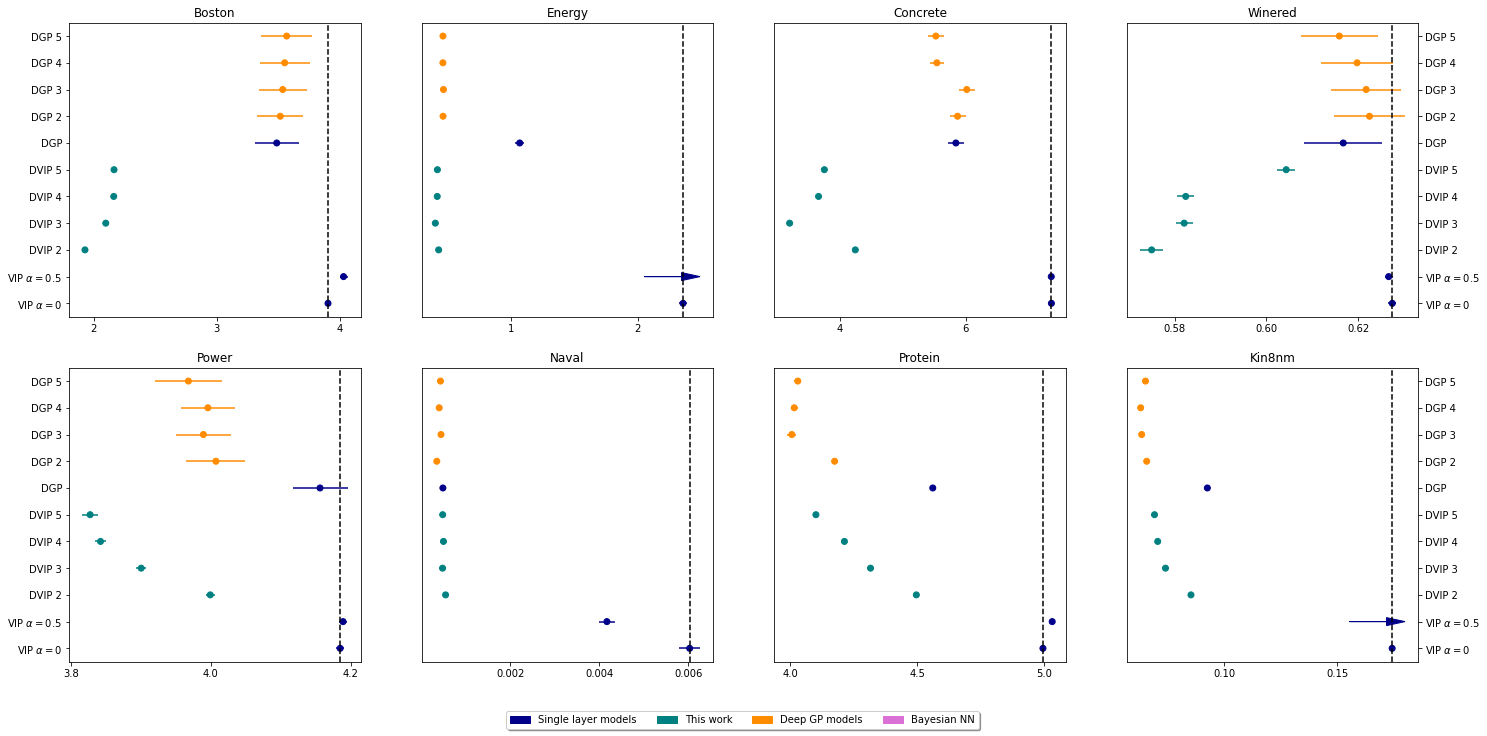

In [146]:
plot_datasets(dataset_names, model_names, colors, "RMSE", train_metrics = True)

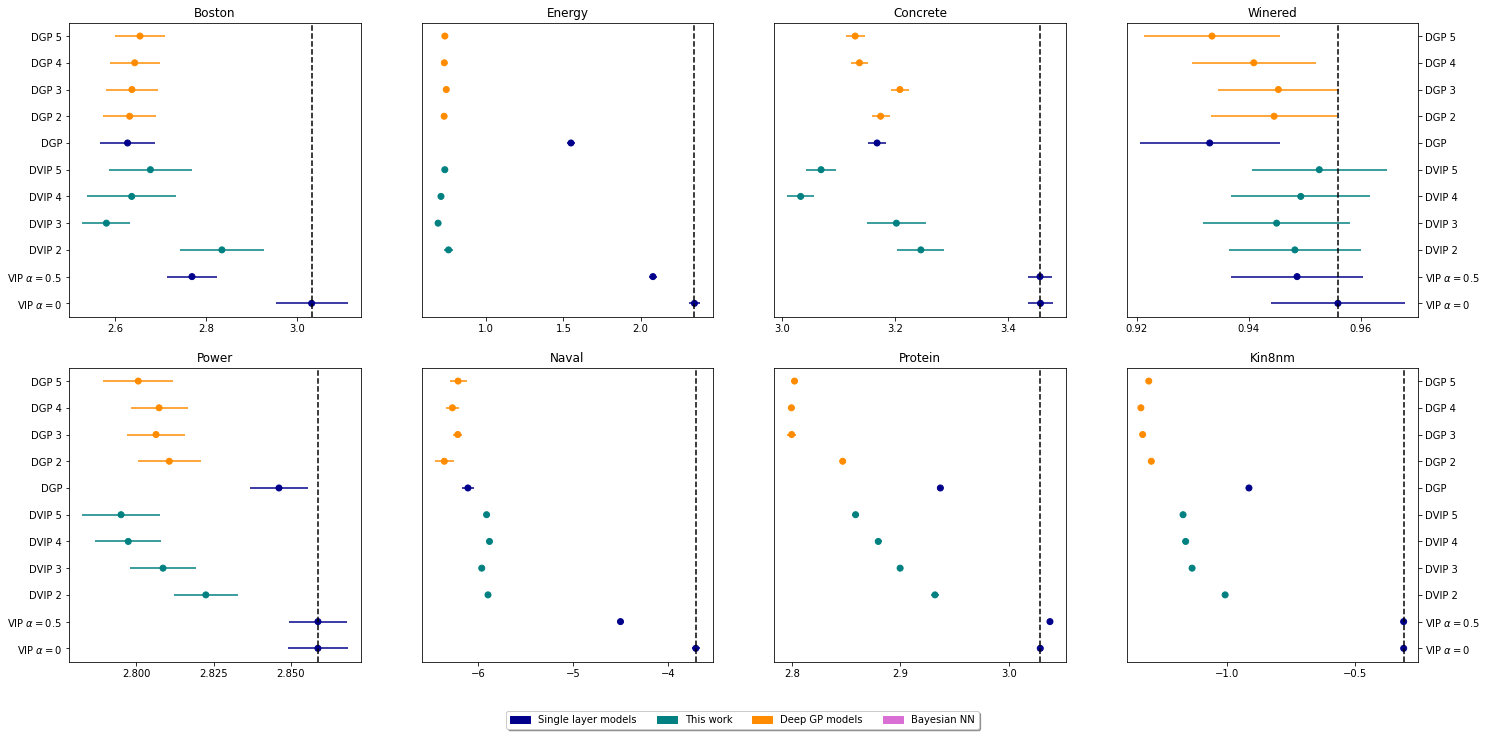

In [147]:
plot_datasets(dataset_names, model_names, colors, "NLL")

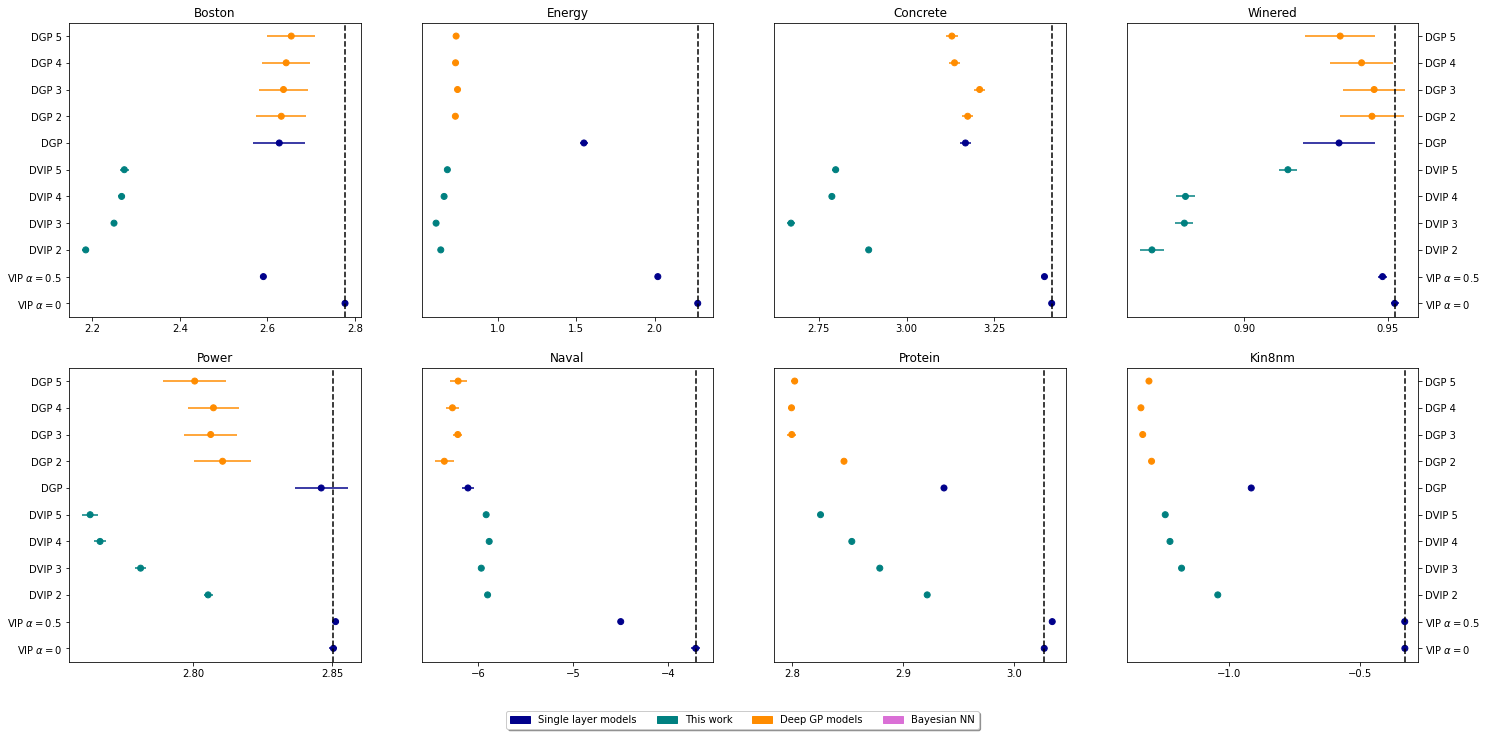

In [148]:
plot_datasets(dataset_names, model_names, colors, "NLL", train_metrics = True)

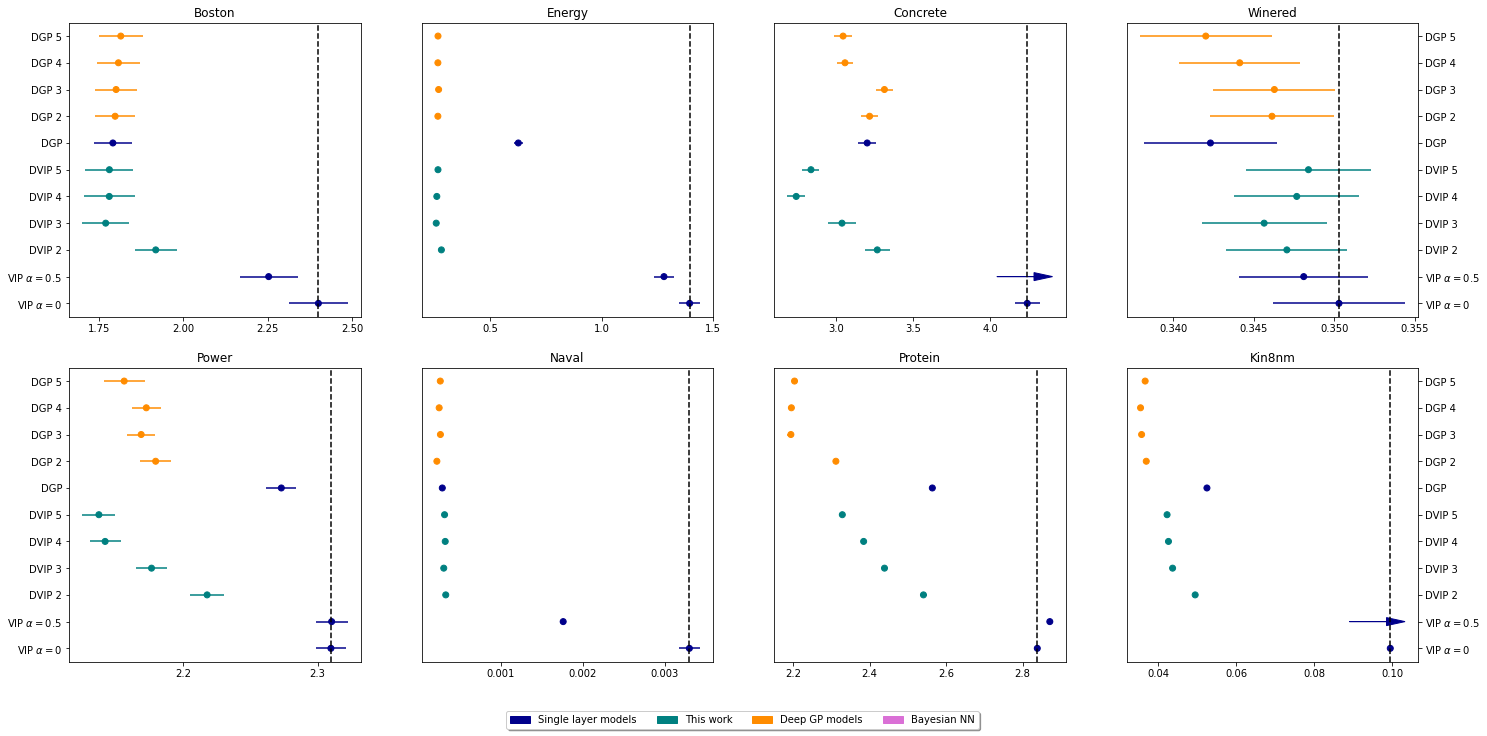

In [149]:
plot_datasets(dataset_names, model_names, colors, "CRPS")

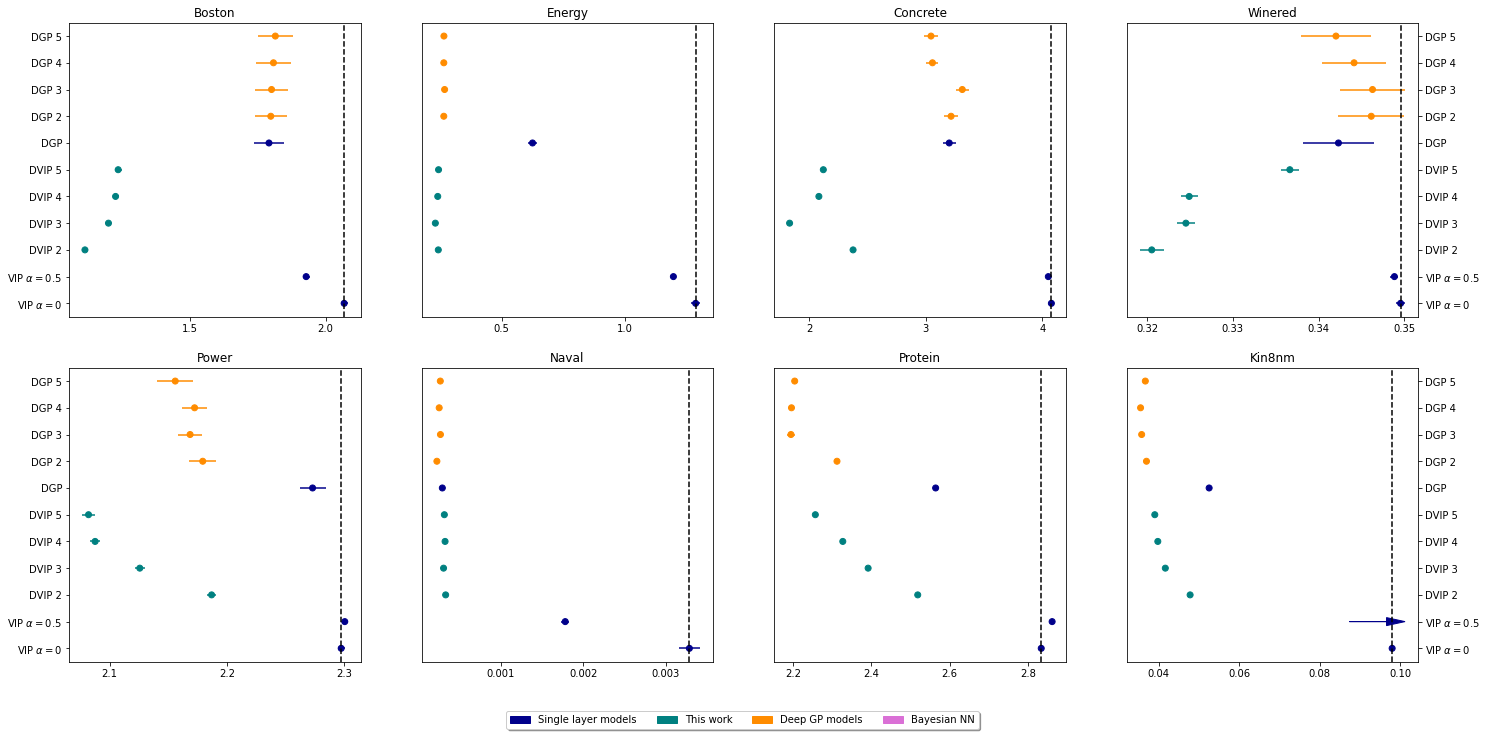

In [150]:
plot_datasets(dataset_names, model_names, colors, "CRPS", train_metrics = True)

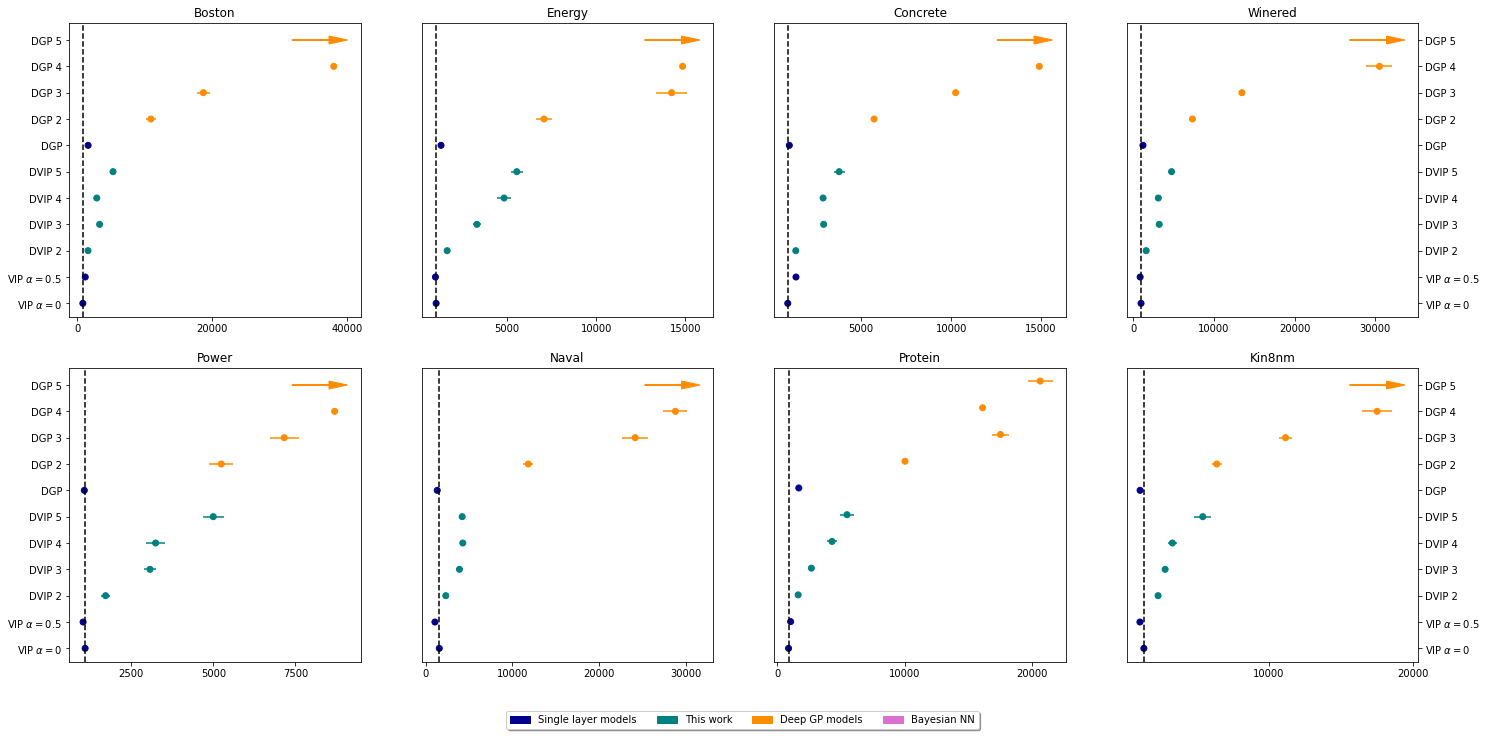

In [151]:
plot_datasets(dataset_names, model_names, colors, "time")